In [31]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [33]:
df = pd.read_csv("C:\\AIdata\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Label')

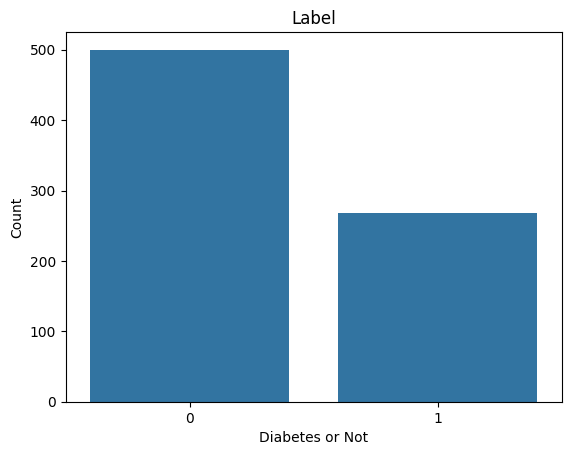

In [36]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Label")

In [37]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\kgg07\AppData\Local\Temp\ipykernel_4584\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


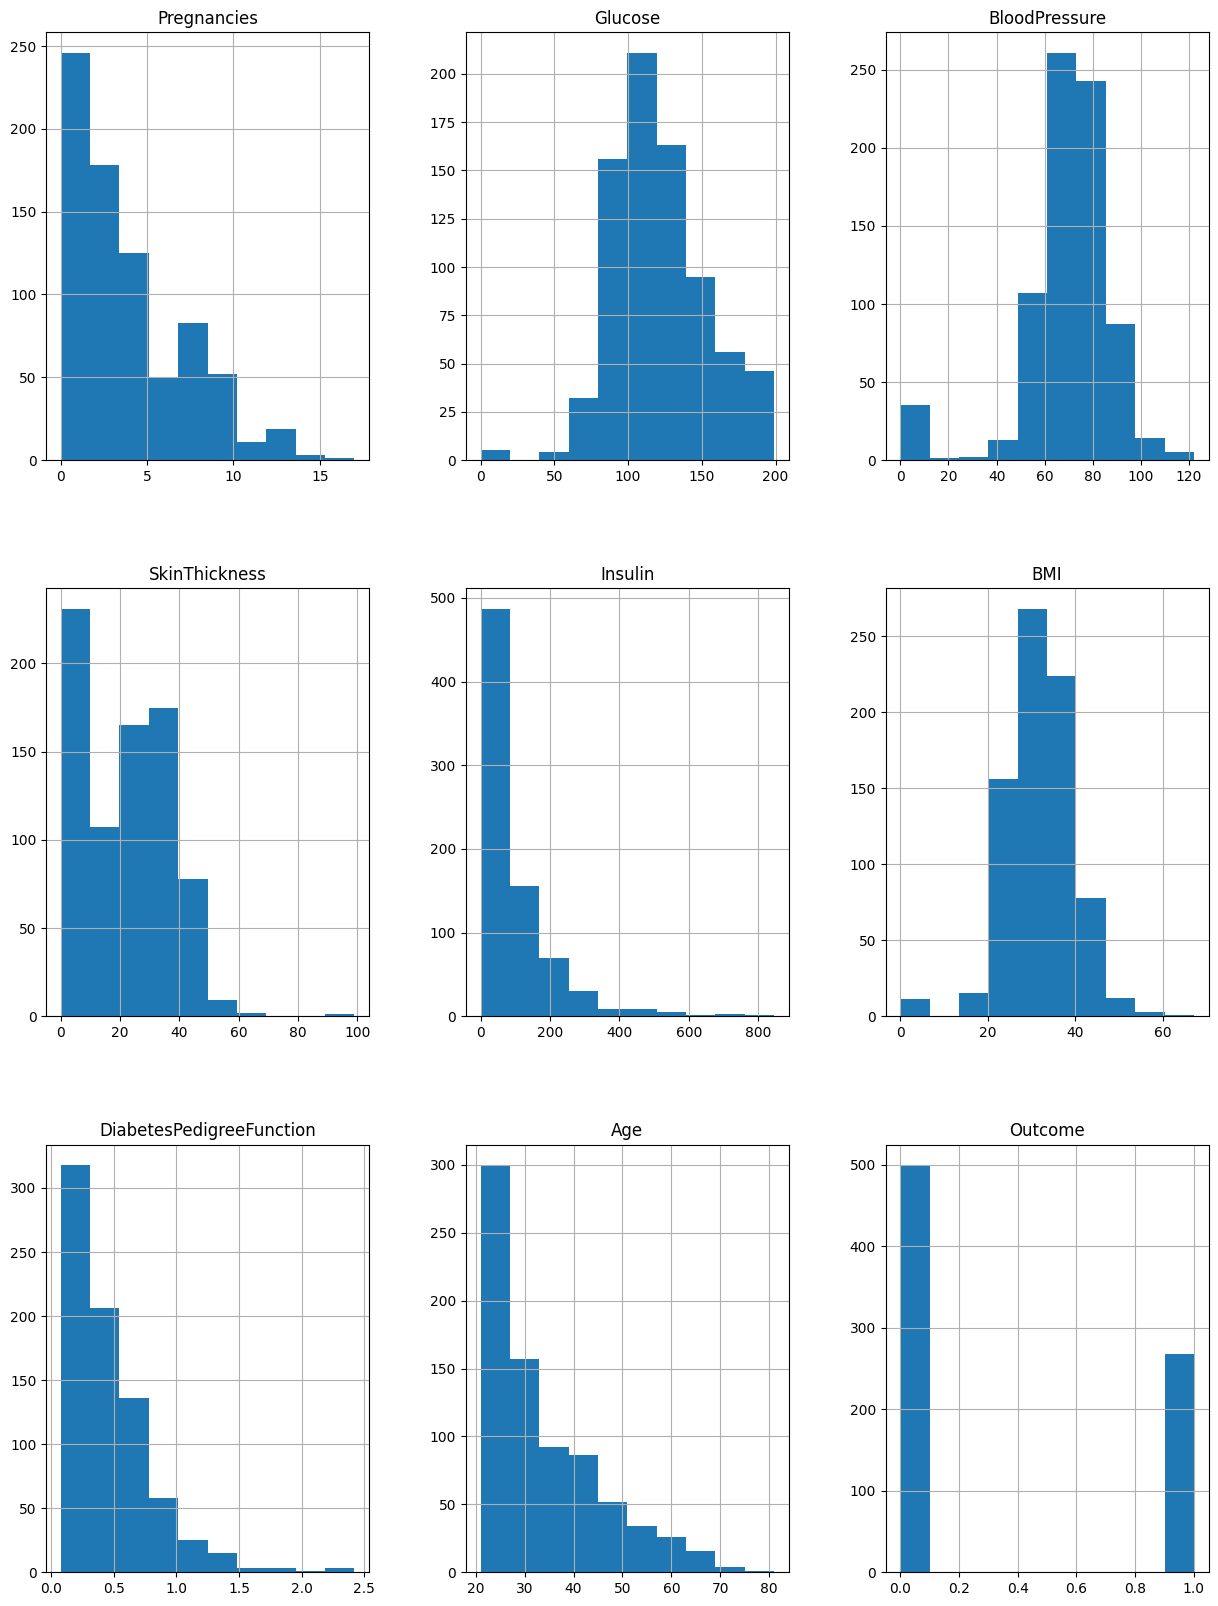

In [40]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

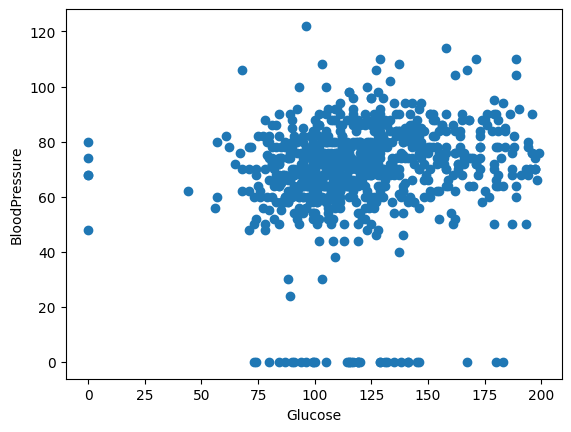

In [41]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.show()

In [42]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [43]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [44]:
print ("===============================================================================")
print ("테스트 데이터에 대한 예측을 수행하고,")
print ("**정확도(accuracy)**와 **혼동 행렬(confusion matrix)**을 출력하여 모델의 성능을 평가")
print ("===============================================================================")

테스트 데이터에 대한 예측을 수행하고,
**정확도(accuracy)**와 **혼동 행렬(confusion matrix)**을 출력하여 모델의 성능을 평가


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
 #서포트 벡터 머신 알고리즘 모델
from sklearn.svm import SVC

clf_svm = SVC(random_state=0) #random_state=0은 결과의 재현성을 보장하기 위해 무작위성을 고정하는 역할
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #정확도 계산
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


In [48]:
#"로지스틱 회귀 분류기를 구축하고 예측하기

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[115  15]
 [ 25  37]]


C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
#MLP(다층 퍼셉트론)라는 인공 신경망 모델을 학습

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7239583333333334
[[103  27]
 [ 26  36]]


In [50]:
# 결정 트리(Decision Tree) 분류기

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [53]:
pred_svm = clf_svm.predict(X_test)
pred_lr = clf_lr.predict(X_test)
pred_nn = clf_nn.predict(X_test)
pred_dt = clf_dt.predict(X_test)

In [54]:
classifiers = ['SVM', 'Logistic Regression', 'Neural Network', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, pred_svm),
    accuracy_score(y_test, pred_lr),
    accuracy_score(y_test, pred_nn),
    accuracy_score(y_test, pred_dt)
]

C:\Users\kgg07\AppData\Local\Temp\ipykernel_4584\3702384714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=accuracies, palette='viridis')


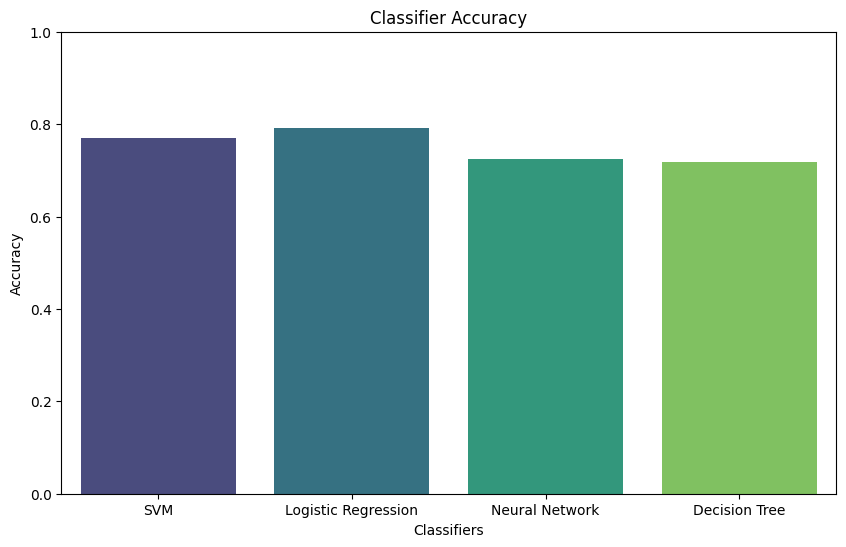

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.show()

In [57]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
    plt.show()

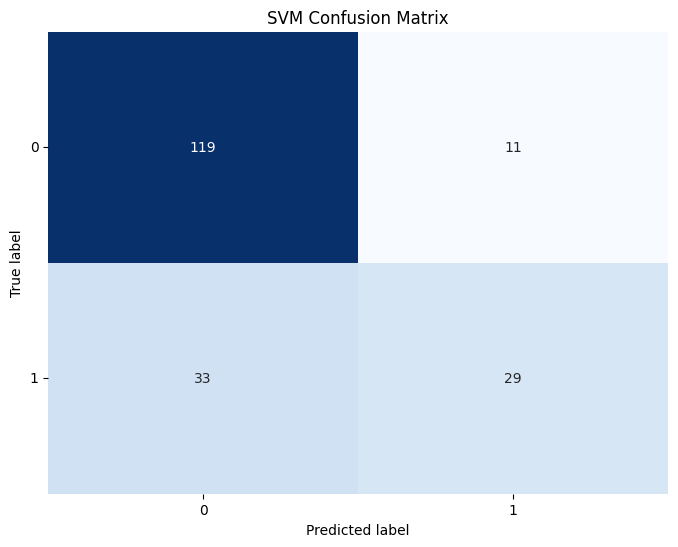

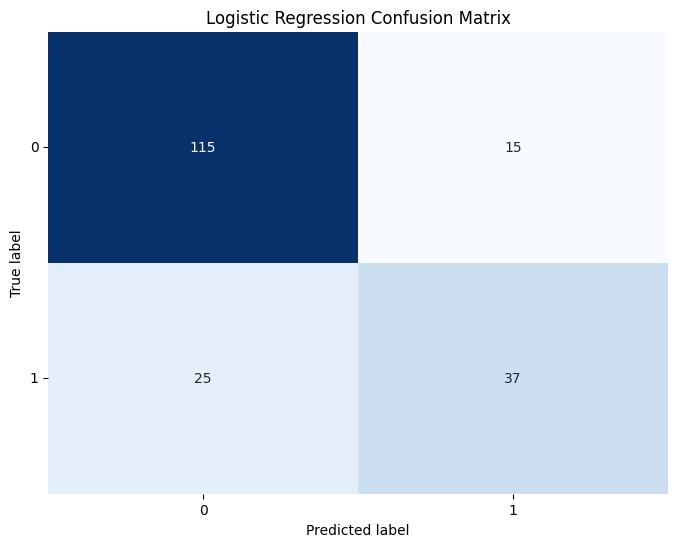

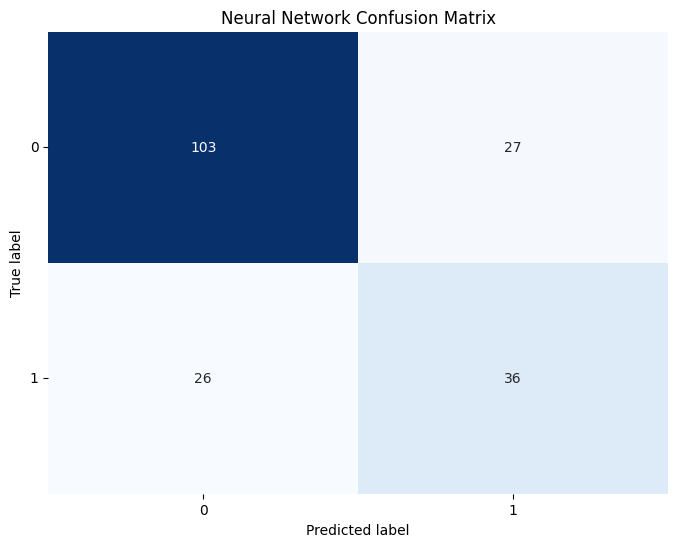

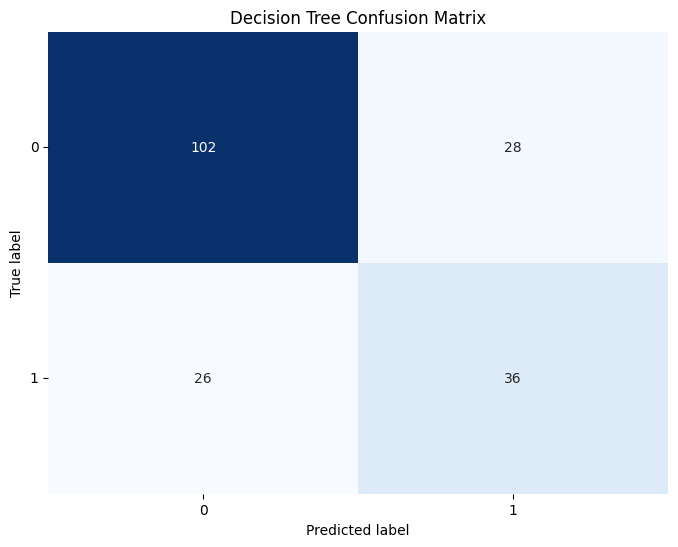

In [58]:
# 각 분류기별 혼동 행렬 시각화
cm_svm = confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, title='SVM Confusion Matrix')

cm_lr = confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, title='Logistic Regression Confusion Matrix')

cm_nn = confusion_matrix(y_test, pred_nn)
plot_confusion_matrix(cm_nn, title='Neural Network Confusion Matrix')

cm_dt = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, title='Decision Tree Confusion Matrix')